### Exploratory Data Analysis on Air Quality Dataset

| Column Name | Data Type | Description | Units |
| -------- | ------- | -------- | ------- |
| Date | Datetime | Date of Monitoring | ------- |
| Time | Datetime | Time of Monitoring| ------- |
| CO(GT) | Integer | True hourly averaged concentration CO in mg/$m^{3}$ (reference analyzer)  |  mg/$m^{3}$|
| PT08.S1(CO) | Categorical | hourly averaged sensor response (nominally CO targeted) | ------- |
| NMHC(GT) | Integer | True hourly averaged overall Non Metanic HydroCarbons concentration in &micro;g/$m^{3}$ (reference analyzer) | &micro;g/$m^{3}$	 |
| C6H6(GT) | Continuous | True hourly averaged Benzene concentration in &micro;g/m^3 (reference analyzer) | ------- |
| PT08.S2(NMHC) | Categorical | hourly averaged sensor response (nominally NMHC targeted) | ------- |
| NOx(GT)   | Integer | True hourly averaged NOx concentration in ppb (reference analyzer) | ppb |
| PT08.S3(NOx)   | Categorical | hourly averaged sensor response (nominally NOx targeted) | ------- |
| NO2(GT)   | Integer | True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) | &micro;g/$m^{3}$ |
| PT08.S4(NO2)   | Categorical | hourly averaged sensor response (nominally NO2 targeted) | ------- |
| PT08.S5(O3)   | Categorical | hourly averaged sensor response (nominally O3 targeted) | ------- |
| T   | Continuous | Temperature | &deg;C |
| RH  | Continuous | Relative Humidity | % |
| AH   | Continuous | Absolute Humidity | ------- |


In [616]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('ggplot')

In [617]:
plt.rcParams['text.color'] = '#000'

In [618]:
df = pd.read_csv('data/AirQualityUCI.csv',sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [619]:
# Remove the categorical columns and some unnecessary columns
df = df.drop(['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)' \
    ,'Unnamed: 15','Unnamed: 16'], axis = 1)
df.shape

(9471, 10)

In [620]:
# To combine Date and Time column and set to index
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' +df['Time'].str.replace('.',':'),format= '%d/%m/%Y %H:%M:%S')
df = df.set_index('Datetime')

# Remove the Date Time since we already have a new index column, Datetime
df = df.drop(['Date','Time'], axis = 1)

# Separate Categorical and Numerical Data Types
df = pd.concat([df.filter(like='GT'),df[['T','RH','AH']]] ,axis=1)
df.head() 

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
Datetime,,,,,,,,
2004-03-10 18:00:00,"2,6",150.0,"11,9",166.0,113.0,"13,6","48,9","0,7578"
2004-03-10 19:00:00,2,112.0,"9,4",103.0,92.0,"13,3","47,7","0,7255"
2004-03-10 20:00:00,"2,2",88.0,"9,0",131.0,114.0,"11,9","54,0","0,7502"
2004-03-10 21:00:00,"2,2",80.0,"9,2",172.0,122.0,"11,0","60,0","0,7867"
2004-03-10 22:00:00,"1,6",51.0,"6,5",131.0,116.0,"11,2","59,6","0,7888"


In [621]:
df[['CO(GT)','C6H6(GT)','T','RH','AH']] = df[['CO(GT)','C6H6(GT)','T','RH','AH']].apply\
    (lambda x: x.str.replace(',','.').astype(float))
df.head()

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
Datetime,,,,,,,,
2004-03-10 18:00:00,2.6,150.0,11.9,166.0,113.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,112.0,9.4,103.0,92.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,88.0,9.0,131.0,114.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,80.0,9.2,172.0,122.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,51.0,6.5,131.0,116.0,11.2,59.6,0.7888


In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9471 entries, 2004-03-10 18:00:00 to NaT
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO(GT)    9357 non-null   float64
 1   NMHC(GT)  9357 non-null   float64
 2   C6H6(GT)  9357 non-null   float64
 3   NOx(GT)   9357 non-null   float64
 4   NO2(GT)   9357 non-null   float64
 5   T         9357 non-null   float64
 6   RH        9357 non-null   float64
 7   AH        9357 non-null   float64
dtypes: float64(8)
memory usage: 665.9 KB


In [623]:
# Observe null (NaN) values
df.isna().sum()

CO(GT)      114
NMHC(GT)    114
C6H6(GT)    114
NOx(GT)     114
NO2(GT)     114
T           114
RH          114
AH          114
dtype: int64

In this dataset, there are 114 values that are either zero or negative values ( there are *-200 values* when I checked the raw data). So, we need to manipulate those negative values to ensure a good correlation analysis.

In [624]:
# Observing Null Values and dropping feature with large rows of null values
for col in df.columns: 
    df[col] = df[col].replace(-200,np.nan)
    print(col,':',df[col].isna().sum()/len(df)) 
    if df[col][:int(len(df)*0.8)].isna().sum()/int(len(df)*0.8) > 0.5: 
        df.drop(col, axis=1, inplace=True)
    else:
        df[col]: df[col].interpolate(method='linear',limit_direction='both')

CO(GT) : 0.18973709217611656
NMHC(GT) : 0.9034948791046352
C6H6(GT) : 0.05068102629078239
NOx(GT) : 0.18509133143279485
NO2(GT) : 0.18540808784711224
T : 0.05068102629078239
RH : 0.05068102629078239
AH : 0.05068102629078239


In [625]:
# As observed there are still a small percentage of null values to some features
# We can drop those rows as follows:
def missing_val_corrections(col):
    df[col] = df.groupby('Datetime')[col].transform(lambda x:x.fillna(x.mean()))
    return col

col_list = df.columns
for i in col_list:
    missing_val_corrections(i)
df.fillna(method='ffill',inplace=True)
df.info()
### Have tried using the forward filling method (df.ffill()) but this way cannot

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9471 entries, 2004-03-10 18:00:00 to NaT
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO(GT)    9471 non-null   float64
 1   C6H6(GT)  9471 non-null   float64
 2   NOx(GT)   9471 non-null   float64
 3   NO2(GT)   9471 non-null   float64
 4   T         9471 non-null   float64
 5   RH        9471 non-null   float64
 6   AH        9471 non-null   float64
dtypes: float64(7)
memory usage: 591.9 KB


C:\Users\user\AppData\Local\Temp\ipykernel_18972\799647612.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


<p style="text-align:justify;">NMHC(GT) column was dropped based on the interpolation since it has a large volumes of outlier that can affect the model. I set the condition of handling null values that if ever there are more than 50% of the first 80% of the dataset (which can represent the train dataset) are classified to be a missing value, we should disregard those feature variable.</p>

<Axes: >

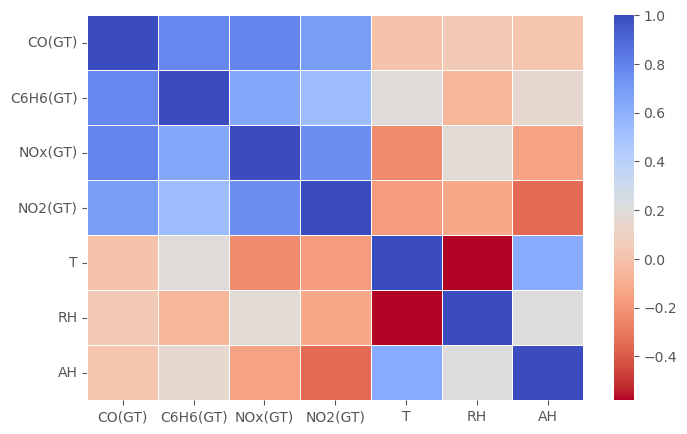

In [645]:
corr_mat = df.dropna().corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_mat,cmap="coolwarm_r",fmt=".2f", linewidths=.5)

Since NO2(GT),NOx(GT), CO(GT), C6H6(GT), T,and RH are observed to have some relative correlations, we can perform some feature engineering among those parameters. Let's provide NO2/NOx ratio and the *dew point* to form a new variable between T and RH using the formula:

$T_d = T-\frac{{100 - RH}}{5}$

In [627]:
#Function to create new features replacing some of the original ones
def create_features(df):
    feat_df= df.copy()
    # CO/C6H6 ratio
    feat_df['CO/C6H6(GT)'] = feat_df['CO(GT)']/feat_df['C6H6(GT)']
    # NO2/NOx ratio
    feat_df['NO2/NOx(GT)'] = feat_df['NO2(GT)']/feat_df['NOx(GT)']
    # Dew Point
    feat_df['Dew_Point'] = abs(feat_df['T'] - (100 - feat_df['RH']) / 5)
    # Remove AH and other columns
    feat_df = feat_df.drop(['T','RH','NO2(GT)','NOx(GT)','C6H6(GT)','CO(GT)'],axis=1)
    return feat_df

df2 = create_features(df)

<Axes: >

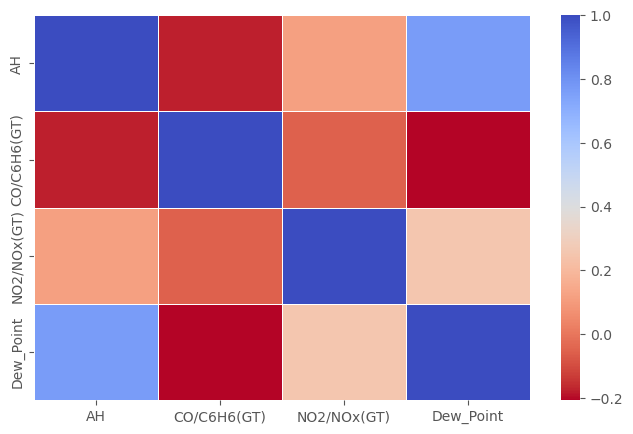

In [628]:
corr_mat = df2.corr().copy()
plt.figure(figsize=(8,5))
sns.heatmap(corr_mat,cmap="coolwarm_r",fmt=".2f", linewidths=.5)

<p style="text-align:justify;">Based on this new correlation heatmap, we can observe that the CO/C6H6 ratio between Dew Point and AH were higly correlated to each other. We may confirm it by building a scatter plot.</p>

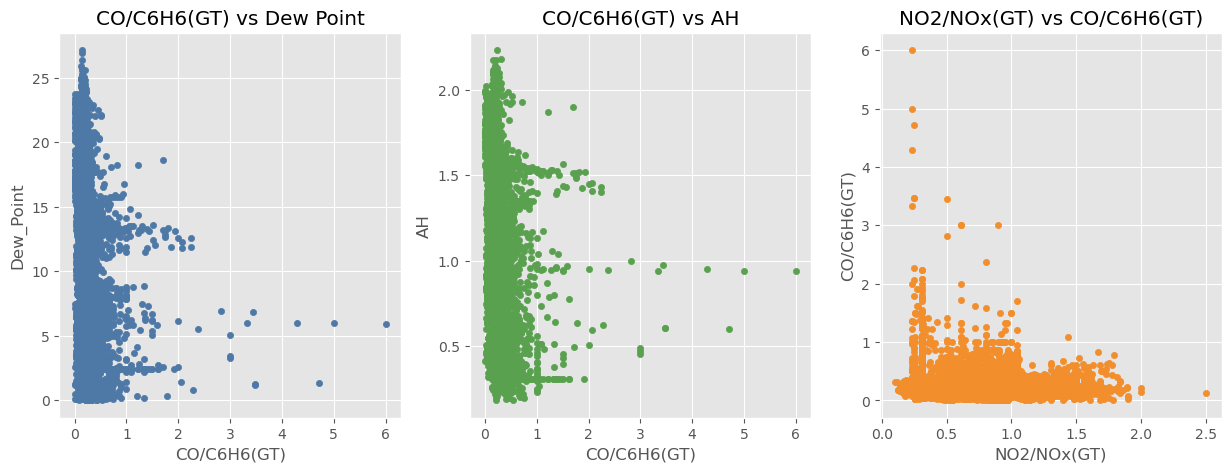

In [629]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
df2.plot(ax = axs[0],kind='scatter',x='CO/C6H6(GT)',y='Dew_Point',color='#4E79A7').set_title('CO/C6H6(GT) vs Dew Point')
df2.plot(ax = axs[1],kind='scatter',x='CO/C6H6(GT)',y='AH',color='#59A14F').set_title('CO/C6H6(GT) vs AH')
df2.plot(ax = axs[2],kind='scatter',x='NO2/NOx(GT)',y='CO/C6H6(GT)',color='#F28E2B').set_title('NO2/NOx(GT) vs CO/C6H6(GT)')

plt.show()

<p style="text-align:justify;">As you can observed from the scatter plot between NO2/NOx ratio and CO/C6H6 ratio, they are highly skewed which can lead to multicollinearity issues when fitting to a regression model. In this case, performing simple linear regression analysis requires a separate curve fitting model for each other. We cannot combine the two when working with algorithms such as linear regression, but other more complex algorithms may handle the skewness of the data. </p>

In [630]:
df2.columns

Index(['AH', 'CO/C6H6(GT)', 'NO2/NOx(GT)', 'Dew_Point'], dtype='object')

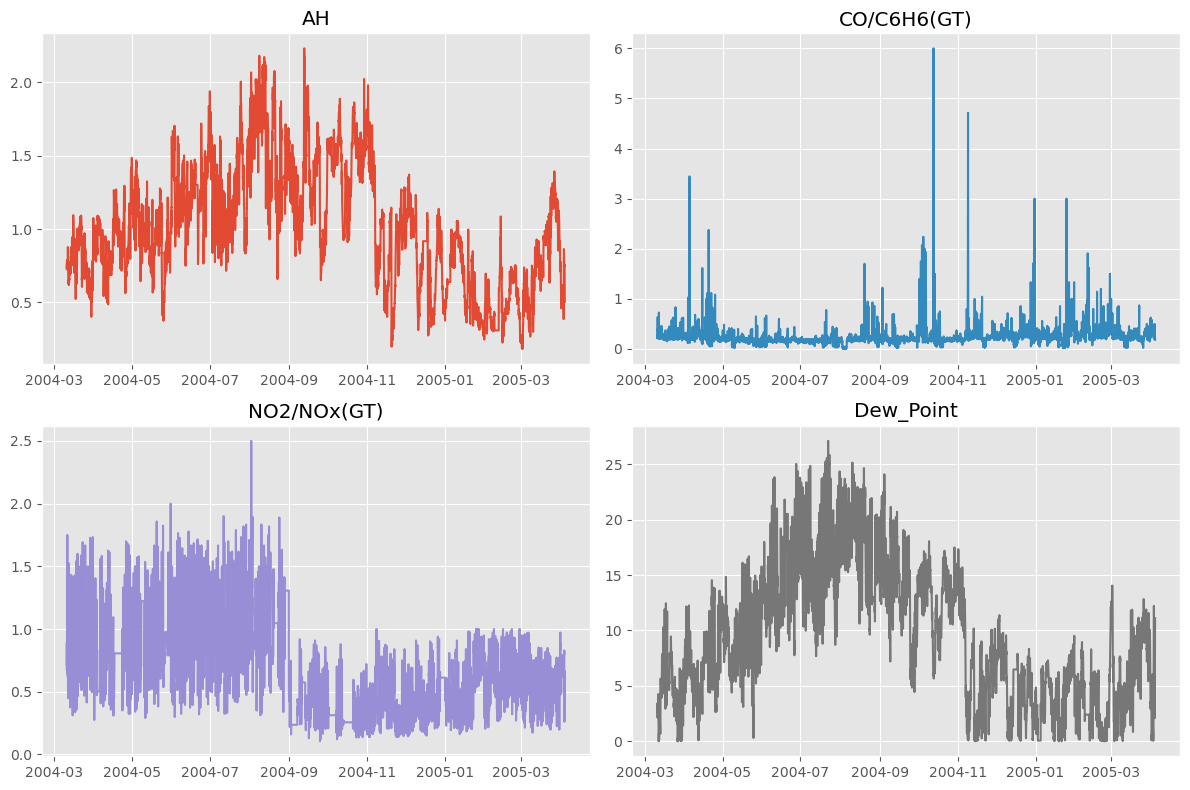

In [631]:
# Time Series Exploration
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(12,8))

for i, feature in enumerate(df2.columns):
    row, col = divmod(i,2)
    ax = axs[row,col]
    color = color_pal[i % len(color_pal)]
    ax.plot(df2.index,df2[feature],label=feature, color=color)
    ax.set_title(f'{feature}')

plt.tight_layout()
plt.show()


<p style="text-align:justify;">As observed each feature may have different trends but the meteorological parameters (AH and Dew Point) are possible candidates as feature variables. Meanwhile, for regression analysis we can provide separate models wherein the target variable are those air pollutant ratios.</p>

In [632]:
# Verifying the shape in saving a cleaned dataset
df2.shape
# df2.to_csv('data/clean_data_AirQualityUCI.csv')

(9471, 4)

In [633]:
df2.columns

Index(['AH', 'CO/C6H6(GT)', 'NO2/NOx(GT)', 'Dew_Point'], dtype='object')

### Machine Learning (Regression Analysis)

Objective:
        Predict the NO2/NOx ratio with features as datetime, dew point, and AH

In [634]:
from sklearn.model_selection import train_test_split
X = df2[['AH','Dew_Point']]
y = df2[['NO2/NOx(GT)']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [647]:
from sklearn.linear_model import LinearRegression
model_line = LinearRegression()
model_line.fit(X_train,y_train)

LinearRegression()

In [648]:
y_pred = model_line.predict(X_test)
y_pred

array([[0.64452934],
       [0.69716882],
       [0.73135119],
       ...,
       [0.63187373],
       [0.67616802],
       [0.6973473 ]])

In [649]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.07781534689787029


In [638]:
# Time Duration Split
overall_date = df2.index.max() - df2.index.min()
split_date = df2.index.min() + 0.8*overall_date
split_date

Timestamp('2005-01-16 14:48:00')

In [639]:
# New Time Features
def create_time_features(df):    
    dft = df2.copy()
    dft['dayofweek'] = df2['dayofweek'] = df2.index.dayofweek
    dft['month'] = df2['month'] = df2.index.month
    return dft

dft = create_time_features(df2)
dft.head()


,AH,CO/C6H6(GT),NO2/NOx(GT),Dew_Point,dayofweek,month
Datetime,,,,,,
2004-03-10 18:00:00,0.7578,0.218487,0.680723,3.38,2.0,3.0
2004-03-10 19:00:00,0.7255,0.212766,0.893204,2.84,2.0,3.0
2004-03-10 20:00:00,0.7502,0.244444,0.870229,2.70,2.0,3.0
2004-03-10 21:00:00,0.7867,0.239130,0.709302,3.00,2.0,3.0
2004-03-10 22:00:00,0.7888,0.246154,0.885496,3.12,2.0,3.0


In [640]:
train = dft.loc[dft.index < split_date]
test = dft.loc[dft.index >= split_date]

In [641]:
dft.columns

Index(['AH', 'CO/C6H6(GT)', 'NO2/NOx(GT)', 'Dew_Point', 'dayofweek', 'month'], dtype='object')

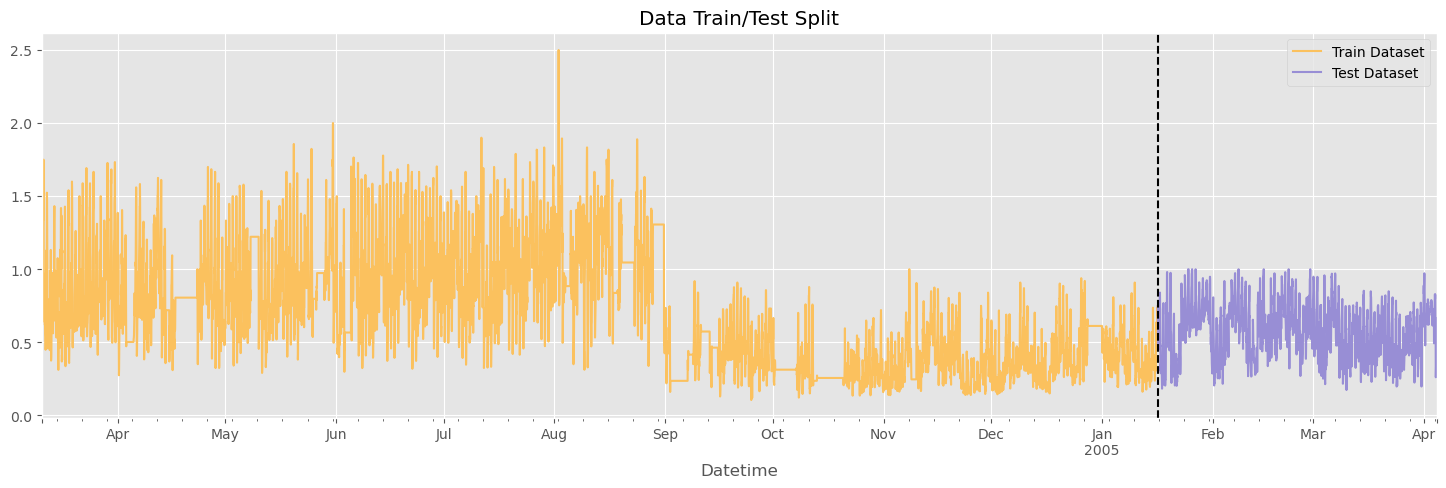

In [642]:
fig, ax = plt.subplots(figsize=(18,5))
train['NO2/NOx(GT)'].plot(ax = ax, title='Data Train/Test Split',color=color_pal[4])
test['NO2/NOx(GT)'].plot(ax = ax,color=color_pal[2])
ax.axvline(split_date,color='black', ls='--')
plt.legend(['Train Dataset','Test Dataset'])
plt.show()

### Time Series Cross Validation

In [643]:
from sklearn.model_selection import TimeSeriesSplit
# Splitting by month
tss = TimeSeriesSplit(n_splits=5, test_size= 24*30, gap=24)
dft = dft.sort_index()
train.columns

Index(['AH', 'CO/C6H6(GT)', 'NO2/NOx(GT)', 'Dew_Point', 'dayofweek', 'month'], dtype='object')

In [644]:
fig, axs = plt.subplots(5,1, figsize=(15,14),sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df2):
    train = dft.iloc[train_idx]
    train['NO2/NOx(GT)'].plot(ax = axs[fold], title=f'Data Train/Test Split {fold}',color=color_pal[4]) 
    test = dft.iloc[val_idx]
    test['NO2/NOx(GT)'].plot(ax = axs[fold],color=color_pal[2])
    axs[fold].axvline(test.index.min(),color='black',ls='--')
    fold += 1
plt.show()

AssertionError: 

Error in callback <function _draw_all_if_interactive at 0x000001C875725AB0> (for post_execute), with arguments args (),kwargs {}:


AssertionError: 

AssertionError: 

<Figure size 1500x1400 with 5 Axes>

In [ ]:
Features_list = ['AH','Dew_Point','dayofweek','month']
Target = 'NO2/NOx(GT)' 

X_train = train[Features_list]
y_train = train[Target]

X_test = test[Features_list]
y_test = test[Target]



In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,learning_rate=0.0001)

reg.fit(X_train,y_train, eval_set=[(X_train,y_train),(X_test,y_test)], verbose=100)

[0]	validation_0-rmse:0.38379	validation_1-rmse:0.17046


[100]	validation_0-rmse:0.38115	validation_1-rmse:0.16968
[200]	validation_0-rmse:0.37854	validation_1-rmse:0.16897
[300]	validation_0-rmse:0.37596	validation_1-rmse:0.16833
[400]	validation_0-rmse:0.37342	validation_1-rmse:0.16774
[500]	validation_0-rmse:0.37092	validation_1-rmse:0.16723
[600]	validation_0-rmse:0.36844	validation_1-rmse:0.16678
[700]	validation_0-rmse:0.36600	validation_1-rmse:0.16639
[800]	validation_0-rmse:0.36359	validation_1-rmse:0.16607
[900]	validation_0-rmse:0.36121	validation_1-rmse:0.16581
[999]	validation_0-rmse:0.35889	validation_1-rmse:0.16561


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
index=reg.feature_names_in_,columns=['Importance'])

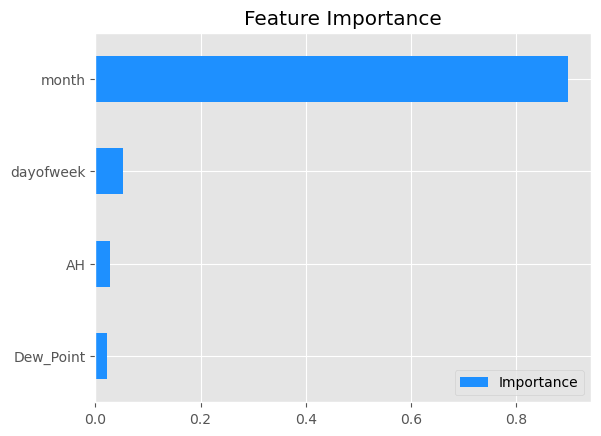

In [ ]:
fi.sort_values('Importance').plot(kind='barh',title='Feature Importance',color='dodgerblue')
plt.show()